In [1]:
from langchain_community.document_loaders import PyPDFDirectoryLoader
loader = PyPDFDirectoryLoader("data")
documents = loader.load()

In [2]:
len(documents)

23

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  
    chunk_overlap=200,  
    add_start_index=True,  
)
all_splits = text_splitter.split_documents(documents)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 54 sub-documents.


In [6]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
vector_store = Chroma(
    embedding_function=embeddings,
    persist_directory='my_chroma_db',
    collection_name='sample'
)

In [5]:
def clean_text(text: str) -> str:
    # Remove or replace invalid surrogate characters
    return text.encode("utf-8", "ignore").decode("utf-8", "ignore")

# Clean all page_content
for doc in all_splits:
    doc.page_content = clean_text(doc.page_content)

# Now add safely
vector_store.add_documents(all_splits)

['726d1ea8-a24c-4e26-b103-af39aaf23337',
 '31b9213e-7eac-442a-8aac-5faea4315ba3',
 '12ea6ac1-e4be-4660-be00-ce9338673ca7',
 'ac630961-d38c-4e23-9aea-a99c1e3ade41',
 '20bbcfd1-294e-44d0-9129-dac8966da2a1',
 '3dd78c06-2a31-43b7-bb67-d358e85eb528',
 '82244aba-4efa-48da-b613-eace1208d01a',
 '22dcac03-bc34-42a7-b72a-1d467de2b148',
 '8f7f8f85-f04e-4d6f-b3ba-2691c24d3646',
 'bde31b28-f54e-4ae8-a9c8-6655ebfabed9',
 '1fabec5f-9b34-465b-a133-280fe6b30f2c',
 '470baf2f-3f58-4262-a8e4-2b981289bf2e',
 '58449d50-b7fc-4ec0-8f6a-366ad908ab5f',
 '8d7b91da-37de-414f-8604-e3ff177a0f1e',
 '6a0ecad1-af91-4049-9825-b29962289978',
 '8d14e7f6-c0b2-4f5a-8829-55588f89810c',
 '4f598b4f-eae9-4821-af06-0991f56a7142',
 'fcaab218-705e-4e56-ac3e-1f338ad8b1df',
 '7fdad575-7250-43e8-aaa7-0732758efa29',
 'f6f18a96-3c3c-4c3e-8293-8474cf5e80da',
 'f37ba7b5-7f0b-48fb-9bad-84e8f158ef6d',
 '13dfea68-b178-4744-8ac2-be7b783dcdf9',
 '7fa9fee1-dccf-4650-ba82-63ff1ed54d09',
 '26b75a1a-a9c8-4fa1-9fd2-a1067542a52a',
 'd4b89d2e-9499-

In [9]:
retriever = vector_store.as_retriever()

In [7]:

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
exam_vector_store = Chroma(
    embedding_function=embeddings,
    persist_directory='examination_cell_03',
    collection_name='sample'
)

In [8]:
exam_retriever = exam_vector_store.as_retriever(search_type="mmr",
    search_kwargs={
        "k": 4,
        "fetch_k": 20,
        "lambda_mult": 0.5
    })

In [10]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
notice_board_store = Chroma(
    embedding_function=embeddings,
    persist_directory='notice_board_3',
    collection_name='sample'
)

In [11]:
notice_retriever = notice_board_store.as_retriever(search_type="mmr",
    search_kwargs={
        "k": 4,
        "fetch_k": 20,
        "lambda_mult": 0.5
    })

In [12]:
from langchain.tools import tool

@tool
def retrieve_blog_posts(query: str) -> str:
    """
    Search and return official university information, including:
    - University overview, rankings, and accreditations
    - Admissions process and entrance exams
    - Eligibility criteria for all courses
    - Scholarships and education loans
    - Office roles, responsibilities, and contact details
    - Fees, payments, and refund policies
    - Campus policies, facilities, and student life
    - International student admissions and requirements
    - Placements, recruiters, and career outcomes
    """
    docs = retriever.invoke(query)
    return "\n\n".join([doc.page_content for doc in docs])

retriever_tool = retrieve_blog_posts

In [10]:
retriever_tool.invoke({"query": "fee structure for Btech"})

'145000 4 Years \nBTech Computer Sc. & IT 145000 4 Years \nBTech Robotics and \nArtificial \nIntelligence \n145000 4 Years \nBTech Artificial \nIntelligence and \nData Science \n145000 4 Years \nBTech Electronic & \nCommunication \nEngineering \n125000 4 Years \nBTech Chemical \nEngineering \n112500 4 Years \nBTech Civil Engineering 112500 4 Years \nBTech Electrical \nEngineering \n112500 4 Years \nBTech Mechanical \nEngineering \n112500 4 Years \nBTech Marine Engineering 112500 4 Years \n \n \nLATERAL ENTRY TO B.TECH \nProgram Fee Per Semester/Year Duration \nCOMPUTER SCIENCE AND \nENGINEERING \n1,12,500/- per Semester 3 Years \nCOMPUTER SC. & IT. 1,12,500/- per Semester 3 Years\n\nFOR ALL TYPES OF FEE PAYMENT: \nGo to the following website: \nhttps://www.eduqfix.com/PayDirect/#/student/pay/t+znLqq9NN80kSDUbCcHUO0LBiDHTDPPrm8m\nNpJ2Q20G4MMoUQeHOednJZ6B7lAy/354 \nSelect Branch as C. V. Raman Global University. \nChoose University Roll Number or Registration Number. \nYour profile detai

In [13]:
@tool
def retrieve_examination_cell_doc(query: str) -> str:
    """
    Search and return official university exam notifications,
    schedules, admit card releases, result notices, and 
    examination circulars .
    """
    docs = exam_retriever.invoke(query)
    return "\n\n".join([doc.page_content for doc in docs])

examination_cell_retriever = retrieve_examination_cell_doc

In [11]:
print(examination_cell_retriever.invoke({"query": "Programme for End Semester & MID Term Examination of M.Tech - Research course 2025 - 26."}))

--- Page 1 ---
### Summary of Examination Schedule

**Institution**: C.V. Raman Global University, Bhubaneswar  
**Document Title**: Programme for End Semester & MID Term Examination of M.Tech - Research course 2025 - 26  
**Date of Document**: 19.12.2025  
**Exam Format**:  
- **End Semester Examination**:  
  - Time: 10:00 AM to 01:00 PM (1st Sitting)  
- **MID Term Examination**:  
  - Time: 03:00 PM to 04:00 PM (2nd Sitting)  

---

### Examination Dates and Subjects

| Date          | Branch       | Subject with Subject Code                                         |
|---------------|--------------|------------------------------------------------------------------|
| 22.12.2025    | CIVIL        | Sub-Surface Water Engineering - CE649                            |
| 22.12.2025    | CIVIL        | Advanced Structural Analysis - CE612                              |
| 22.12.2025    | EE           | Advance Power System Protection - EE621                          |
| 22.12.2025    | CHE

In [14]:
@tool
def retrieve_notice_board_doc(query: str) -> str:
    """
    Search and return official university notices and announcements
    from the CGU Odisha Notice Board ,
    including:
    - Admit card distribution updates
    - Time table for any course/Branch
    - Notifications about academic activities
    - Convocation and award announcements
    - Other official circulars and events
    """
    docs = notice_retriever.invoke(query)
    return "\n\n".join([doc.page_content for doc in docs])

notice_board_doc = retrieve_notice_board_doc

In [13]:
print(notice_board_doc.invoke("Time Table for B.Sc Agriculture - 4th Semester"))

--- Page 1 ---
### Summary of Document

**C. V. Raman Global University**  
**Faculty of Agriculture and Allied Sciences**  
**Time Table: B.Sc. (Hons.) Agriculture 4th semester (w.e.f. 08.12.25)**

---

#### Weekly Schedule

- **Monday (9:30-10:30 AM)**  
  - HORT 402 (P)-G1&G2 (EE 101) SP  
  - ECON 406 (T)-A (EE102) SP  
  - PBGS 405 (T)-B (EE101)  

- **Tuesday (10:30-11:30 AM)**  
  - HORT 406 (P)-G1&G2 (FIELD/NURSERY) Sup AGRO 401 (P)-G3 &G4 (EE101) PN  
  - AGAI 407 (P)-B (CSE Lab) CSE  

- **Wednesday (11:30 AM-12:30 PM)**  
  - HORT 402 (P)-G3&G4 (EE 101) SP  
  - ECON 406 (T)-B (EE102) SP  
  - PBGS 405 (T)-A (EE101)  
  - AGAI 407 (T)-A (EE101)  

- **Thursday (12:30-1:30 PM)**  
  - HORT 406 (P)-G3&G4 (FIELD/NURSERY) Sup AGRO 401 (P)-G1 &G2 (EE101) PN  
  - AGAI 407 (P)-A (CSE Lab) CSE  

- **Friday (1:30-2:30 PM)**  
  - HORT 402 (T)-A (EE101) SPB  
  - SOIL 404 (T)-A (EE101) BS  
  - AGRO 403 (T)-A (EE101) SSM  
  - AGAI 407 (T)-B (EE102) SPB  

- **Saturday (2:30-3:30 PM

In [15]:
from langchain_tavily import TavilySearch
from dotenv import load_dotenv
load_dotenv()
websearch_tool = TavilySearch(
    max_results=5,
    include_raw_content=True,
    search_depth="advanced",
    include_domains=[
        "https://x.com/CguOdisha"
    ],
)

d:\abhi_project\.venv\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
d:\abhi_project\.venv\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


In [16]:
from langgraph.graph import MessagesState
from typing import Annotated
from langchain.chat_models import init_chat_model

class AgentState(MessagesState):
    rewrite_count: Annotated[int, "Number of question rewrites"] = 0
    answer_retry_count: Annotated[int, "Number of answer regenerations"] = 0

response_model = init_chat_model("gpt-4o-mini", temperature=0)


def generate_query_or_respond(state: AgentState):
    """Call the model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever_tool,examination_cell_retriever,notice_board_doc
    websearch_tool or simply respond to the user.
    """
    response = (
        response_model
        .bind_tools([retriever_tool,examination_cell_retriever,notice_board_doc,websearch_tool]).invoke(state["messages"])  
    )
    return {"messages": [response]}

In [26]:
input = {"messages": [{"role": "user", "content": "hello!"}]}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hello! How can I assist you today?


In [27]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "What are the recent post in twitter",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_Yc65Iev8RxGAigjTLpunm3bZ)
 Call ID: call_Yc65Iev8RxGAigjTLpunm3bZ
  Args:
    query: recent posts site:twitter.com
    search_depth: basic


In [28]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "Give me the fee structure for Btech",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  retrieve_blog_posts (call_7LcUuNghsWeFikOpOeUHGn9e)
 Call ID: call_7LcUuNghsWeFikOpOeUHGn9e
  Args:
    query: BTech fee structure


In [29]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "Give me schedule for  end sem exam for Btech ",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  retrieve_examination_cell_doc (call_MzdOrmjPaAdUsFb43u2dSdRh)
 Call ID: call_MzdOrmjPaAdUsFb43u2dSdRh
  Args:
    query: end semester exam schedule BTech


In [17]:
from pydantic import BaseModel, Field
from typing import Literal

GRADE_PROMPT = (
    "You are a grader assessing relevance of a retrieved document to a user question. \n "
    "Here is the retrieved document: \n\n {context} \n\n"
    "Here is the user question: {question} \n"
    "If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n"
    "Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."
)


class GradeDocuments(BaseModel):  
    """Grade documents using a binary score for relevance check."""

    binary_score: str = Field(
        description="Relevance score: 'yes' if relevant, or 'no' if not relevant"
    )


grader_model = init_chat_model("gpt-4o", temperature=0)


def grade_documents(
    state: AgentState,
) -> Literal["generate_answer", "rewrite_question"]:
    """Determine whether the retrieved documents are relevant to the question."""
    question = state["messages"][0].content
    context = state["messages"][-1].content

    rewrite_count = state.get("rewrite_count", 0)

    prompt = GRADE_PROMPT.format(question=question, context=context)
    response = (
        grader_model
        .with_structured_output(GradeDocuments).invoke(  
            [{"role": "user", "content": prompt}]
        )
    )
    
    score = response.binary_score
    print(f"📊 Document relevance grade: {score} (Rewrite attempt: {rewrite_count})")
    
    # Check if we've hit the rewrite limit
    if rewrite_count >= 2:
        print("⚠️ Max rewrites reached. Proceeding to generate answer with available context.")
        return "generate_answer"
    
    if score == "yes":
        return "generate_answer"
    else:
        return "rewrite_question"

In [13]:
from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}
grade_documents(input)

📊 Document relevance grade: no (Rewrite attempt: 0)


'rewrite_question'

In [14]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "reward hacking can be categorized into two types: environment or goal misspecification, and reward tampering",
                "tool_call_id": "1",
            },
        ]
    )
}
grade_documents(input)

📊 Document relevance grade: yes (Rewrite attempt: 0)


'generate_answer'

In [18]:
from langchain.messages import HumanMessage

REWRITE_PROMPT = (
    "Look at the input and try to reason about the underlying semantic intent / meaning.\n"
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "Formulate an improved question:"
)


def rewrite_question(state: AgentState):
    """Rewrite the original user question."""
    messages = state["messages"]
    question = messages[0].content

    current_count = state.get("rewrite_count", 0)
    prompt = REWRITE_PROMPT.format(question=question)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {
        "messages": [HumanMessage(content=response.content)],
        "rewrite_count": current_count + 1
    }

In [19]:
from langchain_core.messages import SystemMessage, HumanMessage,ToolMessage
def generate_answer(state: AgentState):
    """Generate an answer."""
    question = state["messages"][0].content
    context = state["messages"][-1].content
    context_list = [m.content for m in state["messages"] if isinstance(m, ToolMessage)]
    context = "\n\n".join(context_list)
    retry_count = state.get("answer_retry_count", 0)

    GENERATE_PROMPT = [
        SystemMessage(content="You are an assistant for question-answering tasks for C.V Raman global university,Bhubaneswar,Odisha,India (CGU)."),
        HumanMessage(content=f"""
Use the following pieces of retrieved context to answer the question. 
If tools answer is not related to the user question, just say that you don't know. 
Question: {question}
Context: {context}
""")
    ]
    response = response_model.invoke(GENERATE_PROMPT)
    return {
        "messages": [response],
        "answer_retry_count": retry_count + 1
    }

In [20]:
from langgraph.graph import END
HALLUCINATION_PROMPT = (
    "You are a hallucination detector. Review the following answer in relation to the user's question.\n"
    "Question: {question}\n"
    "Answer: {answer}\n\n"
    "If the answer is factual, relevant, and grounded in the question context, respond 'no'. "
    "If it seems incorrect, fabricated, or off-topic, respond 'yes'."
)

class HallucinationCheck(BaseModel):
    hallucination: Literal["yes", "no"] = Field(..., description="Final evaluation result.")

def check_hallucination(state: AgentState) -> dict:
    """Check if the generated answer is hallucinated."""
    question = state["messages"][0].content
    answer = state["messages"][-1].content
    
    retry_count = state.get("answer_retry_count", 0)

    prompt = HALLUCINATION_PROMPT.format(question=question, answer=answer)
    response = (
        grader_model
        .with_structured_output(HallucinationCheck)
        .invoke([{"role": "user", "content": prompt}])
    )
    
    hallucination_score = response.hallucination
    print(f"📊 Hallucination score: {hallucination_score} (Retry attempt: {retry_count})")
    
    # Check if we've hit the retry limit
    if retry_count >= 2:
        print("⚠️ Max answer retries reached. Returning current answer.")
        return END
    
    if hallucination_score == "yes":
        return "generate_answer"
    else:
        return END

In [21]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node(generate_query_or_respond)
workflow.add_node("retrieve", ToolNode([retriever_tool,examination_cell_retriever,notice_board_doc,websearch_tool]))
workflow.add_node(rewrite_question)
workflow.add_node(generate_answer)

workflow.add_edge(START, "generate_query_or_respond")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "generate_query_or_respond",
    # Assess LLM decision (call `retriever_tool` tool or respond to the user)
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_conditional_edges(
    "generate_answer",
    # Assess agent decision
    check_hallucination,
)
workflow.add_edge("generate_answer", END)
workflow.add_edge("rewrite_question", "generate_query_or_respond")

# Compile
graph = workflow.compile()

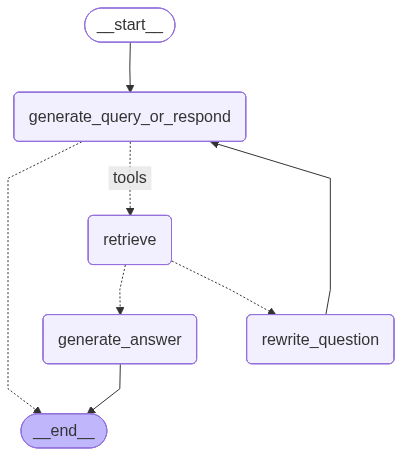

In [22]:
graph

In [13]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is the fee structure for btech?",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node", node)
        update["messages"][-1].pretty_print()
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_blog_posts (call_RpwfqGT2gKXQZwO65kaWJAzi)
 Call ID: call_RpwfqGT2gKXQZwO65kaWJAzi
  Args:
    query: BTech fee structure



📊 Document relevance grade: yes (Rewrite attempt: 0)
Update from node retrieve
================================= Tool Message =================================
Name: retrieve_blog_posts

FOR ALL TYPES OF FEE PAYMENT: 
Go to the following website: 
https://www.eduqfix.com/PayDirect/#/student/pay/t+znLqq9NN80kSDUbCcHUO0LBiDHTDPPrm8m
NpJ2Q20G4MMoUQeHOednJZ6B7lAy/354 
Select Branch as C. V. Raman Global University. 
Choose University Roll Number or Registration Number. 
Your profile details (such as name, program, and division) will be displayed. 
Select the fee type, enter the fee amount, and click Continue to proceed with the payment. 
             Tuition Fee Structure 
               BTech 
Program Branch Fee Per Semes

In [62]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "give me programme for End Semester & MID Term Examination of M.Tech - Research course 2025 - 26",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node", node)
        update["messages"][-1].pretty_print()
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_examination_cell_doc (call_sOn7M6oQfPaeNOhPvxY8KNbq)
 Call ID: call_sOn7M6oQfPaeNOhPvxY8KNbq
  Args:
    query: End Semester Examination M.Tech Research 2025-26
  retrieve_examination_cell_doc (call_DxfZYA4IrSX9hO5TIYd03ncd)
 Call ID: call_DxfZYA4IrSX9hO5TIYd03ncd
  Args:
    query: MID Term Examination M.Tech Research 2025-26



📊 Document relevance grade: yes (Rewrite attempt: 0)
Update from node retrieve
================================= Tool Message =================================
Name: retrieve_examination_cell_doc

--- Page 1 ---
### Summary of Examination Schedule

**Institution**: C.V. Raman Global University, Bhubaneswar  
**Document Title**: Programme for End Semester & MID Term Examination of M.Tech - Research course 2025 - 26  
**Date of Document**: 19.12.2025  
**Exam Format**:  
- **End Semester Examination**:  
  - Time: 10:

In [81]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "Topper list of all Btech students for Gold Medal in 6th Convocation",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node", node)
        update["messages"][-1].pretty_print()
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_notice_board_doc (call_wvp9P3IP5rOMjkCEYCWketfK)
 Call ID: call_wvp9P3IP5rOMjkCEYCWketfK
  Args:
    query: Topper list of all Btech students for Gold Medal in 6th Convocation



📊 Document relevance grade: yes (Rewrite attempt: 0)
Update from node retrieve
================================= Tool Message =================================
Name: retrieve_notice_board_doc

--- Page 1 ---
### Summary of Notice

**Institution:** C.V. Raman Global University, Bhubaneswar  
**Date:** 08.12.2025  
**Reference Number:** CGU/EXAM/0887/2025  

**Subject:** Topper List of Students Considered for Gold Medal in 6th Convocation

#### Key Information:
- **Applicable Groups:**
  - 2021 Admission Batch: B.Tech, B.Sc (AG)
  - 2023 Admission Batch: BBA, MBA, M.Tech, M.Sc, MA

- **Event:** Awarding of Gold Medal during the 6th Convocation.

- **Date of Convocatio

In [25]:
from langgraph.checkpoint.postgres.aio import AsyncPostgresSaver
import os
DB_URI = os.getenv("DATABASE_URL")

async def main():
    # Keep the connection open while streaming
    async with AsyncPostgresSaver.from_conn_string(DB_URI) as checkpointer:
        # Compile with the active checkpointer
        graph = workflow.compile(checkpointer=checkpointer)
        
        config = {"configurable": {"thread_id": "1"}}
        inputs = {"messages": [{"role": "user", "content": "What is the fee structure for btech?"}]}

        # Use astream for asynchronous streaming
        async for chunk in graph.astream(inputs, config, stream_mode="updates"):
            for node, update in chunk.items():
                print(f"\n--- Update from node: {node} ---")
                if "messages" in update:
                    update["messages"][-1].pretty_print()

await main()


--- Update from node: generate_query_or_respond ---
================================== Ai Message ==================================
Tool Calls:
  retrieve_blog_posts (call_vuAc5lZV4JpJNrl0EJgXpSnm)
 Call ID: call_vuAc5lZV4JpJNrl0EJgXpSnm
  Args:
    query: B.Tech fee structure
📊 Document relevance grade: no (Rewrite attempt: 0)

--- Update from node: retrieve ---
================================= Tool Message =================================
Name: retrieve_blog_posts

FOR ALL TYPES OF FEE PAYMENT: 
Go to the following website: 
https://www.eduqfix.com/PayDirect/#/student/pay/t+znLqq9NN80kSDUbCcHUO0LBiDHTDPPrm8m
NpJ2Q20G4MMoUQeHOednJZ6B7lAy/354 
Select Branch as C. V. Raman Global University. 
Choose University Roll Number or Registration Number. 
Your profile details (such as name, program, and division) will be displayed. 
Select the fee type, enter the fee amount, and click Continue to proceed with the payment. 
             Tuition Fee Structure 
               BTech 
Program Bra

In [5]:
from langgraph.checkpoint.postgres.aio import AsyncPostgresSaver
import os
DB_URI = os.getenv("DATABASE_URL")

async def setup_checkpoint_db():
    async with AsyncPostgresSaver.from_conn_string(DB_URI) as checkpointer:
        await checkpointer.setup()
        print("✅ Checkpoint tables created")

await setup_checkpoint_db()

✅ Checkpoint tables created
